# 爬虫基础

在学习爬虫之前，需要了解一些基础知识，如HTTP的原理、网页的基础知识、爬虫的基本原理、Cookies的基本原理。

# 1. HTTP基本原理

## 1.1 URI和URL

URI的全称为Uniform Resource Identifier，即统一资源标志符，URL的全称为Universal Resource Locator，即统一资源定位符。

举例来说，[https://github.com/favicon.ico](https://github.com/favicon.ico) 是GitHub的网站图标链接，它是一个URL，也是一个URI。即有这样的一个图标资源，我们用URL/URI来唯一指定了它的访问方式，这其中包括了访问协议https、访问路径（/即根目录）和资源名称favicon.ico。通过这样一个链接，我们便可以从互联网上找到这个资源，这就是URL/URI。

URL是URI的子集，也就是说每个URL都是URI，但不是每个URI都是URL。那么，怎样的URI不是URL呢？URI还包括一个子类叫作URN，它的全称为Universal Resource Name，即统一资源名称。URN只命名资源而不指定如何定位资源，比如urn:isbn:0451450523 指定了一本书的ISBN，可以唯一标识这本书，但是没有指定到哪里定位这本书，这就是URN。URL、URN和URI的关系可以用图2-1表示。

但是在目前的互联网中，URN用得非常少，所以几乎所有的URI都是URL，一般的网页链接我们既可以称为URL，也可以称为URI。

## 1.2 超文本

我们再了解一个概念——超文本，其英文名称叫作hypertext，我们在浏览器里看到的网页就是超文本解析而成的，其网页源代码是一系列HTML代码，里面包含了一系列标签，比如img显示图片，p指定显示段落等。浏览器解析这些标签后，便形成了我们平常看到的网页，而网页的源代码HTML就可以称作超文本。

用浏览器开发者工具，Element选项里面看到的，就是网页的源代码，这些源代码就是超文本。

## 1.3 HTTP和HTTPS

URL的开头会有http或https，这就是访问资源需要的协议类型。有时，我们还会看到ftp、sftp、smb开头的URL，它们都是协议类型。在爬虫中，我们抓取的页面通常就是http或https协议的，这里首先了解一下这两个协议的含义。

HTTP的全称是Hyper Text Transfer Protocol，中文名叫作超文本传输协议。HTTP协议是用于从网络传输超文本数据到本地浏览器的传送协议，它能保证高效而准确地传送超文本文档。

HTTPS的安全基础是SSL，因此通过它传输的内容都是经过SSL加密的，它的主要作用可以分为两种。
+ 建立一个信息安全通道来保证数据传输的安全。
+ 确认网站的真实性，凡是使用了HTTPS的网站，都可以通过点击浏览器地址栏的锁头标志来查看网站认证之后的真实信息，也可以通过CA机构颁发的安全签章来查询。

而某些网站虽然使用了HTTPS协议，但还是会被浏览器提示不安全，例如我们在Chrome浏览器里面打开12306，链接为：https://www.12306.cn/ ，这时浏览器就会提示“您的连接不是私密连接”这样的话

这是因为12306的CA证书是中国铁道部自行签发的，而这个证书是不被CA机构信任的，所以这里证书验证就不会通过而提示这样的话，但是实际上它的数据传输依然是经过SSL加密的。如果要爬取这样的站点，就需要设置忽略证书的选项，否则会提示SSL链接错误。

## 1.4 HTTP请求过程

我们在浏览器中输入一个URL，回车之后便会在浏览器中观察到页面内容。实际上，这个过程是浏览器向网站所在的服务器发送了一个请求，网站服务器接收到这个请求后进行处理和解析，然后返回对应的响应，接着传回给浏览器。响应里包含了页面的源代码等内容，浏览器再对其进行解析，便将网页呈现了出来

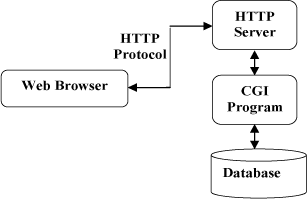

为了更直观地地说明这个过程，这里用Chrome浏览器的开发者模式下的Network监听组件来做下演示，它可以显示访问当前请求网页时发生的所有网络请求和响应。在Network页面下方出现了一个个的条目，其中一个条目就代表一次发送请求和接收响应的过程

其中各列的含义如下:
+ 第一列Name：请求的名称，一般会将URL的最后一部分内容当作名称。
+ 第二列Status：响应的状态码，这里显示为200，代表响应是正常的。通过状态码，我们可以判断发送了请求之后是否得到了正常的响应。
+ 第三列Type：请求的文档类型。这里为document，代表我们这次请求的是一个HTML文档，内容就是一些HTML代码。
+ 第四列Initiator：请求源。用来标记请求是由哪个对象或进程发起的。
+ 第五列Size：从服务器下载的文件和请求的资源大小。如果是从缓存中取得的资源，则该列会显示from cache。
+ 第六列Time：发起请求到获取响应所用的总时间。
+ 第七列Waterfall：网络请求的可视化瀑布流。

## 1.5 请求

请求，由客户端向服务端发出，可以分为4部分内容：请求方法（Request Method）、请求的网址（Request URL）、请求头（Request Headers）、请求体（Request Body）。

### 1.5.1 请求方式

常见的请求方法有两种：GET和POST。

在浏览器中直接输入URL并回车，这便发起了一个GET请求，请求的参数会直接包含到URL里。

POST请求大多在表单提交时发起。比如，对于一个登录表单，输入用户名和密码后，点击“登录”按钮，这通常会发起一个POST请求，其数据通常以表单的形式传输，而不会体现在URL中。

一般来说，登录时，需要提交用户名和密码，其中包含了敏感信息，使用GET方式请求的话，密码就会暴露在URL里面，造成密码泄露，所以这里最好以POST方式发送。上传文件时，由于文件内容比较大，也会选用POST方式。

根据HTTP标准，HTTP请求可以使用多种请求方法。详情点击[这里](http://www.runoob.com/http/http-methods.html)。

HTTP1.0定义了三种请求方法： GET, POST 和 HEAD方法。

HTTP1.1新增了五种请求方法：OPTIONS, PUT, DELETE, TRACE 和 CONNECT 方法。

### 1.5.2 请求网址

请求的网址，即统一资源定位符URL，它可以唯一确定我们想请求的资源。

### 1.5.3 请求头

请求头，用来说明服务器要使用的附加信息，比较重要的信息有Cookie、Referer、User-Agent等。下面简要说明一些常用的头信息。
+ Accept：请求报头域，用于指定客户端可接受哪些类型的信息。
+ Accept-Language：指定客户端可接受的语言类型。
+ Accept-Encoding：指定客户端可接受的内容编码。
+ Host：用于指定请求资源的主机IP和端口号，其内容为请求URL的原始服务器或网关的位置。从HTTP 1.1版本开始，请求必须包含此内容。
+ Cookie：也常用复数形式 Cookies，这是网站为了辨别用户进行会话跟踪而存储在用户本地的数据。它的主要功能是维持当前访问会话。例如，我们输入用户名和密码成功登录某个网站后，服务器会用会话保存登录状态信息，后面我们每次刷新或请求该站点的其他页面时，会发现都是登录状态，这就是Cookies的功劳。Cookies里有信息标识了我们所对应的服务器的会话，每次浏览器在请求该站点的页面时，都会在请求头中加上Cookies并将其发送给服务器，服务器通过Cookies识别出是我们自己，并且查出当前状态是登录状态，所以返回结果就是登录之后才能看到的网页内容。
+ Referer：此内容用来标识这个请求是从哪个页面发过来的，服务器可以拿到这一信息并做相应的处理，如作来源统计、防盗链处理等。
+ User-Agent：简称UA，它是一个特殊的字符串头，可以使服务器识别客户使用的操作系统及版本、浏览器及版本等信息。在做爬虫时加上此信息，可以伪装为浏览器；如果不加，很可能会被识别出为爬虫。
+ Content-Type：也叫互联网媒体类型（Internet Media Type）或者MIME类型，在HTTP协议消息头中，它用来表示具体请求中的媒体类型信息。例如，text/html代表HTML格式，image/gif代表GIF图片，application/json代表JSON类型，更多对应关系可以查看此对照表：http://tool.oschina.net/commons。

因此，请求头是请求的重要组成部分，在写爬虫时，大部分情况下都需要设定请求头。

### 1.5.4 请求体

请求体一般承载的内容是POST请求中的表单数据，而对于GET请求，请求体则为空。

已登录百度为例，登录之前，我们填写了用户名和密码信息，提交时这些内容就会以表单数据的形式提交给服务器，此时需要注意Request Headers中指定Content-Type为application/x-www-form-urlencoded。只有设置Content-Type为application/x-www-form-urlencoded，才会以表单数据的形式提交。

|Content-Type|提交数据的方式|
|-|-|
|application/x-www-form-urlencoded|表单数据|
|ultipart/form-data|表单文件上传|
|pplication/json|序列化JSON数据|
|text/xml|ML数据|

## 1.6 响应

响应，由服务端返回给客户端，可以分为三部分：响应状态码（Response Status Code）、响应头（Response Headers）和响应体（Response Body）。

### 1.6.1 响应状态码

HTTP状态码的英文为HTTP Status Code。当浏览者访问一个网页时，浏览者的浏览器会向网页所在服务器发出请求。当浏览器接收并显示网页前，此网页所在的服务器会返回一个包含HTTP状态码的信息头（server header）用以响应浏览器的请求。

下面是常见的HTTP状态码：
+ 200 - 请求成功
+ 301 - 资源（网页等）被永久转移到其它URL
+ 404 - 请求的资源（网页等）不存在
+ 500 - 内部服务器错误

在爬虫中，我们可以根据状态码来判断服务器响应状态，如状态码为200，则证明成功返回数据，再进行进一步的处理，否则直接忽略。更多的状态码点击[这里](http://www.runoob.com/http/http-status-codes.html)。

### 1.6.2 响应头

HTTP请求头提供了关于请求，响应或者其他的发送实体的信息。

菜鸟教程里面有一些关于响应头的信息，点击[这里](http://www.runoob.com/http/http-header-fields.html)。

### 1.6.3 响应体

最重要的当属响应体的内容了。响应的正文数据都在响应体中，比如请求网页时，它的响应体就是网页的HTML代码；请求一张图片时，它的响应体就是图片的二进制数据。我们做爬虫请求网页后，要解析的内容就是响应体。

在浏览器开发者工具中点击Preview，就可以看到网页的源代码，也就是响应体的内容，它是解析的目标。

在做爬虫时，我们主要通过响应体得到网页的源代码、JSON数据等，然后从中做相应内容的提取。

# 2. 网页基础

这里网页的基本组成、结构和节点等内容，就不做讲解。主要回顾一下css选择器。

我们知道网页由一个个节点组成，CSS选择器会根据不同的节点设置不同的样式规则，那么怎样来定位节点呢？

在CSS中，我们使用CSS选择器来定位节点。例如，上例中div节点的id为container，那么就可以表示为#container，其中#开头代表选择id，其后紧跟id的名称。另外，如果我们想选择class为wrapper的节点，便可以使用.wrapper，这里以点（.）开头代表选择class，其后紧跟class的名称。另外，还有一种选择方式，那就是根据标签名筛选，例如想选择二级标题，直接用h2即可。这是最常用的3种表示，分别是根据id、class、标签名筛选，请牢记它们的写法。

另外，CSS选择器还支持嵌套选择，各个选择器之间加上空格分隔开便可以代表嵌套关系，如#container .wrapper p则代表先选择id为container的节点，然后选中其内部的class为wrapper的节点，然后再进一步选中其内部的p节点。另外，如果不加空格，则代表并列关系，如div#container .wrapper p.text代表先选择id为container的div节点，然后选中其内部的class为wrapper的节点，再进一步选中其内部的class为text的p节点。这就是CSS选择器，其筛选功能还是非常强大的。

更多的规则见文档：http://www.runoob.com/cssref/css-selectors.html

# 3. 爬虫的基本原理

我们可以把互联网比作一张大网，而爬虫（即网络爬虫）便是在网上爬行的蜘蛛。把网的节点比作一个个网页，爬虫爬到这就相当于访问了该页面，获取了其信息。可以把节点间的连线比作网页与网页之间的链接关系，这样蜘蛛通过一个节点后，可以顺着节点连线继续爬行到达下一个节点，即通过一个网页继续获取后续的网页，这样整个网的节点便可以被蜘蛛全部爬行到，网站的数据就可以被抓取下来了。

## 3.1 爬虫概述

简单来说，爬虫就是获取网页并提取和保存信息的自动化程序，下面概要介绍一下。

### 3.1.1 获取网页

爬虫首先要做的工作就是获取网页，这里就是获取网页的源代码。源代码里包含了网页的部分有用信息，所以只要把源代码获取下来，就可以从中提取想要的信息了。

前面讲了请求和响应的概念，向网站的服务器发送一个请求，返回的响应体便是网页源代码。所以，最关键的部分就是构造一个请求并发送给服务器，然后接收到响应并将其解析出来，那么这个流程怎样实现呢？总不能手工去截取网页源码吧？

不用担心，Python提供了许多库来帮助我们实现这个操作，如urllib、requests等。我们可以用这些库来帮助我们实现HTTP请求操作，请求和响应都可以用类库提供的数据结构来表示，得到响应之后只需要解析数据结构中的Body部分即可，即得到网页的源代码，这样我们可以用程序来实现获取网页的过程了。

### 3.1.2 提取数据

获取网页源代码后，接下来就是分析网页源代码，从中提取我们想要的数据。首先，最通用的方法便是采用正则表达式提取，这是一个万能的方法，但是在构造正则表达式时比较复杂且容易出错。

另外，由于网页的结构有一定的规则，所以还有一些根据网页节点属性、CSS选择器或XPath来提取网页信息的库，如Beautiful Soup、pyquery、lxml等。使用这些库，我们可以高效快速地从中提取网页信息，如节点的属性、文本值等。

提取信息是爬虫非常重要的部分，它可以使杂乱的数据变得条理清晰，以便我们后续处理和分析数据。

### 3.1.3 数据保存

提取信息后，我们一般会将提取到的数据保存到某处以便后续使用。这里保存形式有多种多样，如可以简单保存为TXT文本或JSON文本，也可以保存到数据库，如MySQL和MongoDB等，也可保存至远程服务器，如借助SFTP进行操作等。

### 3.1.4 自动化程序

说到自动化程序，意思是说爬虫可以代替人来完成这些操作。首先，我们手工当然可以提取这些信息，但是当量特别大或者想快速获取大量数据的话，肯定还是要借助程序。爬虫就是代替我们来完成这份爬取工作的自动化程序，它可以在抓取过程中进行各种异常处理、错误重试等操作，确保爬取持续高效地运行。

## 3.2 获取什么样的数据

在网页中我们能看到各种各样的信息，最常见的便是常规网页，它们对应着HTML代码，而最常抓取的便是HTML源代码。

另外，可能有些网页返回的不是HTML代码，而是一个JSON字符串（其中API接口大多采用这样的形式），这种格式的数据方便传输和解析，它们同样可以抓取，而且数据提取更加方便。

此外，我们还可以看到各种二进制数据，如图片、视频和音频等。利用爬虫，我们可以将这些二进制数据抓取下来，然后保存成对应的文件名。

另外，还可以看到各种扩展名的文件，如CSS、JavaScript和配置文件等，这些其实也是最普通的文件，只要在浏览器里面可以访问到，就可以将其抓取下来。

上述内容其实都对应各自的URL，是基于HTTP或HTTPS协议的，只要是这种数据，爬虫都可以抓取。

## 3.3 JavaScript渲染页面

有时候，我们在用urllib或requests抓取网页时，得到的源代码实际和浏览器中看到的不一样。

这是一个非常常见的问题。现在网页越来越多地采用Ajax、前端模块化工具来构建，整个网页可能都是由JavaScript渲染出来的，也就是说原始的HTML代码就是一个空壳。在浏览器中打开这个页面时，首先会加载这个HTML内容，接着浏览器会发现其中引入了一个js文件，然后便会接着去请求这个文件，获取到该文件后，便会执行其中的JavaScript代码，而JavaScript则会改变HTML中的节点，向其添加内容，最后得到完整的页面。

但是在用urllib或requests等库请求当前页面时，我们得到的只是这个HTML代码，它不会帮助我们去继续加载这个JavaScript文件，这样也就看不到浏览器中的内容了。

因此，使用基本HTTP请求库得到的源代码可能跟浏览器中的页面源代码不太一样。对于这样的情况，我们可以分析其后台Ajax接口，也可使用Selenium、Splash这样的库来实现模拟JavaScript渲染。

# 4. 会话和Cookies

在浏览网站的过程中，我们经常会遇到需要登录的情况，有些页面只有登录之后才可以访问，而且登录之后可以连续访问很多次网站，但是有时候过一段时间就需要重新登录。还有一些网站，在打开浏览器时就自动登录了，而且很长时间都不会失效，这种情况又是为什么？其实这里面涉及会话和Cookies的相关知识，本节就来揭开它们的神秘面纱。

## 4.1 静态页面和动态页面

用最基本最基本的HTML代码，我们将其保存为一个.html文件，然后把它放在某台具有固定公网IP的主机上，主机上装上Apache或Nginx等服务器，这样这台主机就可以作为服务器了，其他人便可以通过访问服务器看到这个页面，这就搭建了一个最简单的网站。

这种网页的内容是HTML代码编写的，文字、图片等内容均通过写好的HTML代码来指定，这种页面叫作静态网页。它加载速度快，编写简单，但是存在很大的缺陷，如可维护性差，不能根据URL灵活多变地显示内容等。例如，我们想要给这个网页的URL传入一个name参数，让其在网页中显示出来，是无法做到的。

因此，动态网页应运而生，它可以动态解析URL中参数的变化，关联数据库并动态呈现不同的页面内容，非常灵活多变。我们现在遇到的大多数网站都是动态网站，它们不再是一个简单的HTML，而是可能由JSP、PHP、Python等语言编写的，其功能比静态网页强大和丰富太多了。

此外，动态网站还可以实现用户登录和注册的功能。再回到开头提到的问题，很多页面是需要登录之后才可以查看的。按照一般的逻辑来说，输入用户名和密码登录之后，肯定是拿到了一种类似凭证的东西，有了它，我们才能保持登录状态，才能访问登录之后才能看到的页面。

## 4.2 会话和Cookies

两个用于保持HTTP连接状态的技术，它们分别是会话和Cookies。会话在服务端，也就是网站的服务器，用来保存用户的会话信息；Cookies在客户端，也可以理解为浏览器端，有了Cookies，浏览器在下次访问网页时会自动附带上它发送给服务器，服务器通过识别Cookies并鉴定出是哪个用户，然后再判断用户是否是登录状态，然后返回对应的响应。

我们可以理解为Cookies里面保存了登录的凭证，有了它，只需要在下次请求携带Cookies发送请求而不必重新输入用户名、密码等信息重新登录了。

因此在爬虫中，有时候处理需要登录才能访问的页面时，我们一般会直接将登录成功后获取的Cookies放在请求头里面直接请求，而不必重新模拟登录。

好了，了解会话和Cookies的概念之后，我们在来详细剖析它们的原理。

### 4.2.1 会话

会话，其本来的含义是指有始有终的一系列动作/消息。比如，打电话时，从拿起电话拨号到挂断电话这中间的一系列过程可以称为一个会话。

而在Web中，会话对象用来存储特定用户会话所需的属性及配置信息。这样，当用户在应用程序的Web页之间跳转时，存储在会话对象中的变量将不会丢失，而是在整个用户会话中一直存在下去。当用户请求来自应用程序的Web页时，如果该用户还没有会话，则Web服务器将自动创建一个会话对象。当会话过期或被放弃后，服务器将终止该会话。

### 4.2.2 Cookies

Cookies指某些网站为了辨别用户身份、进行会话跟踪而存储在用户本地终端上的数据。

+ **会话维持 **

那么，我们怎样利用Cookies保持状态呢？当客户端第一次请求服务器时，服务器会返回一个请求头中带有Set-Cookie字段的响应给客户端，用来标记是哪一个用户，客户端浏览器会把Cookies保存起来。当浏览器下一次再请求该网站时，浏览器会把此Cookies放到请求头一起提交给服务器，Cookies携带了会话ID信息，服务器检查该Cookies即可找到对应的会话是什么，然后再判断会话来以此来辨认用户状态。

在成功登录某个网站时，服务器会告诉客户端设置哪些Cookies信息，在后续访问页面时客户端会把Cookies发送给服务器，服务器再找到对应的会话加以判断。如果会话中的某些设置登录状态的变量是有效的，那就证明用户处于登录状态，此时返回登录之后才可以查看的网页内容，浏览器再进行解析便可以看到了。

反之，如果传给服务器的Cookies是无效的，或者会话已经过期了，我们将不能继续访问页面，此时可能会收到错误的响应或者跳转到登录页面重新登录。

所以，Cookies和会话需要配合，一个处于客户端，一个处于服务端，二者共同协作，就实现了登录会话控制。

+ **属性结构 **

以知乎为例，看看Cookies的属性：

+ Name：该Cookie的名称。一旦创建，该名称便不可更改。
+ Value：该Cookie的值。如果值为Unicode字符，需要为字符编码。如果值为二进制数据，则需要使用BASE64编码。
+ Domain：可以访问该Cookie的域名。例如，如果设置为.zhihu.com，则所有以zhihu.com，结尾的域名都可以访问该Cookie。
+ Max Age：该Cookie失效的时间，单位为秒，也常和Expires一起使用，通过它可以计算出其有效时间。Max Age如果为正数，则该Cookie在Max Age秒之后失效。如果为负数，则关闭浏览器时Cookie即失效，浏览器也不会以任何形式保存该Cookie。
+ Path：该Cookie的使用路径。如果设置为/path/，则只有路径为/path/的页面可以访问该Cookie。如果设置为/，则本域名下的所有页面都可以访问该Cookie。
+ Size字段：此Cookie的大小。
+ HTTP字段：Cookie的httponly属性。若此属性为true，则只有在HTTP头中会带有此Cookie的信息，而不能通过document.cookie来访问此Cookie。
+ Secure：该Cookie是否仅被使用安全协议传输。安全协议有HTTPS和SSL等，在网络上传输数据之前先将数据加密。默认为false。

+ **会话Cookie和持久Cookie **

从表面意思来说，会话Cookie就是把Cookie放在浏览器内存里，浏览器在关闭之后该Cookie即失效；持久Cookie则会保存到客户端的硬盘中，下次还可以继续使用，用于长久保持用户登录状态。

其实严格来说，没有会话Cookie和持久Cookie之分，只是由Cookie的Max Age或Expires字段决定了过期的时间。

因此，一些持久化登录的网站其实就是把Cookie的有效时间和会话有效期设置得比较长，下次我们再访问页面时仍然携带之前的Cookie，就可以直接保持登录状态。

由于涉及一些专业名词知识，本节的部分内容参考来源如下。
+ 会话百度百科：https://baike.baidu.com/item/session/479100
+ Cookies百度百科：https://baike.baidu.com/item/cookie/1119
+ HTTP Cookie维基百科：https://en.wikipedia.org/wiki/HTTP_cookie
+ 会话和几种状态保持方案理解：http://www.mamicode.com/info-detail-46545.html

# 5. 代理

我们在做爬虫的过程中经常会遇到这样的情况，最初爬虫正常运行，正常抓取数据，一切看起来都是那么美好，然而一杯茶的功夫可能就会出现错误，比如403 Forbidden，这时候打开网页一看，可能会看到“您的IP访问频率太高”这样的提示。出现这种现象的原因是网站采取了一些反爬虫措施。比如，服务器会检测某个IP在单位时间内的请求次数，如果超过了这个阈值，就会直接拒绝服务，返回一些错误信息，这种情况可以称为封IP。

既然服务器检测的是某个IP单位时间的请求次数，那么借助某种方式来伪装我们的IP，让服务器识别不出是由我们本机发起的请求，不就可以成功防止封IP了吗？

一种有效的方式就是使用代理，后面会详细说明代理的用法。在这之前，需要先了解下代理的基本原理，它是怎样实现IP伪装的呢？

## 5.1 基本原理

代理实际上指的就是代理服务器，英文叫作proxy server，它的功能是代理网络用户去取得网络信息。形象地说，它是网络信息的中转站。在我们正常请求一个网站时，是发送了请求给Web服务器，Web服务器把响应传回给我们。如果设置了代理服务器，实际上就是在本机和服务器之间搭建了一个桥，此时本机不是直接向Web服务器发起请求，而是向代理服务器发出请求，请求会发送给代理服务器，然后由代理服务器再发送给Web服务器，接着由代理服务器再把Web服务器返回的响应转发给本机。这样我们同样可以正常访问网页，但这个过程中Web服务器识别出的真实IP就不再是我们本机的IP了，就成功实现了IP伪装，这就是代理的基本原理。

## 5.2 爬虫代理

对于爬虫来说，由于爬虫爬取速度过快，在爬取过程中可能遇到同一个IP访问过于频繁的问题，此时网站就会让我们输入验证码登录或者直接封锁IP，这样会给爬取带来极大的不便。

使用代理隐藏真实的IP，让服务器误以为是代理服务器在请求自己。这样在爬取过程中通过不断更换代理，就不会被封锁，可以达到很好的爬取效果。

更多信息可以参考一下资料：
+ 代理服务器 维基百科：https://zh.wikipedia.org/wiki/代理服务器
+ 代理 百度百科：https://baike.baidu.com/item/代理/3242667

# 6 工具安装

## 6.1 jupyter notebook的安装和配置

**(1) 安装jupyter notebook**

+ pip install jupyter

输入jupyter notebook命令，查看当前jupyter指定的位置

(2)配置

+ jupyter notebook --generate-config 

执行之后会产生

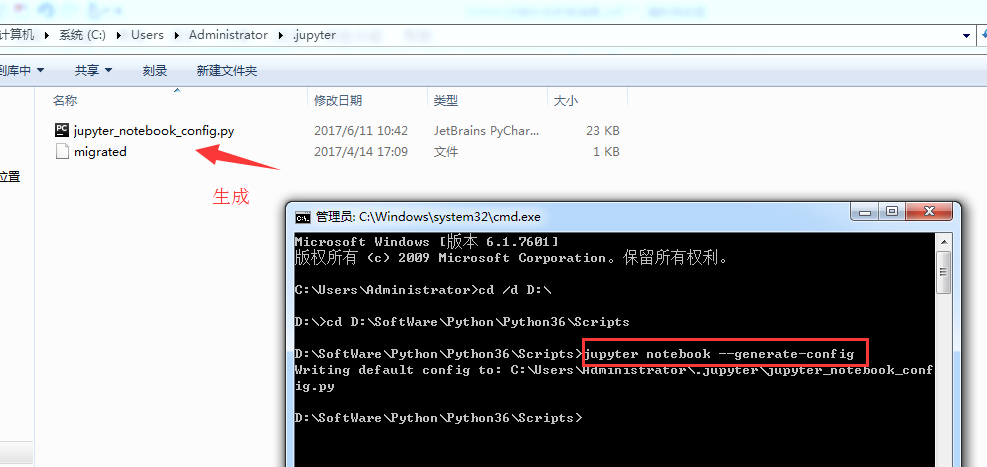

**(3) 修改jupyter_notebook_config.py配置文件**

打开这个配置文件，找到“c.NotebookApp.notebook_dir=……”，把路径改成自己的工作目录。

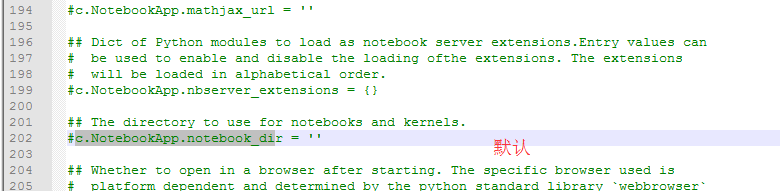

比如，这里要变更为

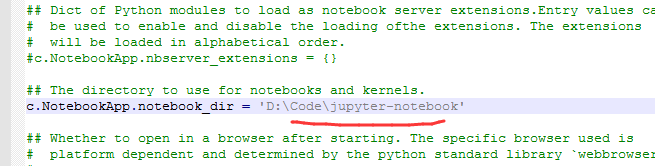

可以参考：https://blog.csdn.net/wang603603/article/details/78616851

## 6.2 PyCharm的安装

直接百度搜索[官方网站](http://www.jetbrains.com/pycharm/)，下载Community版本进行安装。

# 7. 数据库的安装

## 7.1 MongoDB的安装

Windows安装方法参考：https://blog.csdn.net/heshushun/article/details/77776706

MongoDB的可视化工具RoboMongo/Robo 3T：https://robomongo.org/download

接下来安装pymongo
+ pip install pymongo

进行验证：
+ 进入python环境
+ import pymysql
+ pymysql.VERSION

官方参考文档：http://api.mongodb.com/python/current/api/pymongo/

## 7.2 Redis安装

**（1）Redis安装**

Redis下载地址：https://github.com/MicrosoftArchive/redis/releases

可以下载Redis-x64-3.2.100.msi安装即可。

安装过程比较简单，直接点击Next按钮安装即可。安装完成后，Redis便会启动。

Redis可视化工具：https://github.com/uglide/RedisDesktopManager/releases

**（2）redis-py的安装**

这里推荐使用pip安装，命令如下：
+ pip3 install redis

进行验证：

+ 进入python3环境
+ import redis
+ redis.VERSION